In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns

En este bloque debes asignar los vectores/el batch. He usado random para poder testear

In [56]:
np.random.seed(0)
base_vectors = np.random.randn(32, 128)
pair_vectors = base_vectors + np.random.normal(0, 1, base_vectors.shape)
positive_pairs = np.vstack([base_vectors, pair_vectors])

In [57]:
distances = np.linalg.norm(base_vectors - pair_vectors, axis=1)
distances.mean()

np.float64(11.198972166631496)

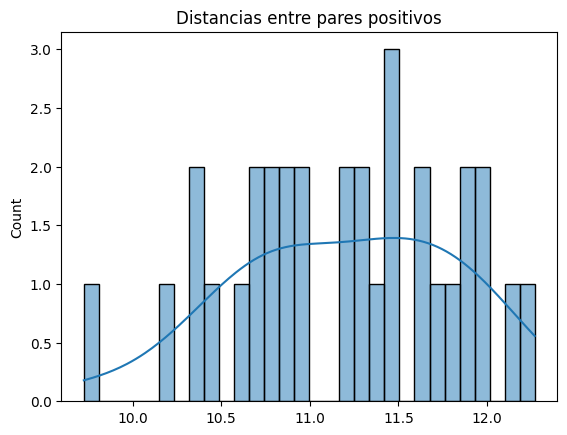

In [58]:
sns.histplot(distances, bins=30, kde=True)
plt.title("Distancias entre pares positivos")
plt.show()

In [62]:
def plot_projection(data, labels, title):
    plt.figure(figsize=(6, 4))
    for i in range(0, len(data), 2):
        plt.scatter(data[i, 0], data[i, 1], c='blue', label='A' if i == 0 else "")
        plt.scatter(data[i+1, 0], data[i+1, 1], c='red', label='B' if i == 0 else "")
        plt.plot([data[i, 0], data[i+1, 0]], [data[i, 1], data[i+1, 1]], 'k--', alpha=0.5)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [63]:
def project_and_plot(pairs, method='pca'):
    pairs = np.array(pairs)

    if method == 'pca':
        model = PCA(n_components=2)
    elif method == 'tsne':
        model = TSNE(n_components=2, random_state=42, perplexity=30)
    else:
        print("Unsupported")


    projected = model.fit_transform(pairs)
    plot_projection(projected, None, f"{method.upper()} Projection of Positive Pairs")

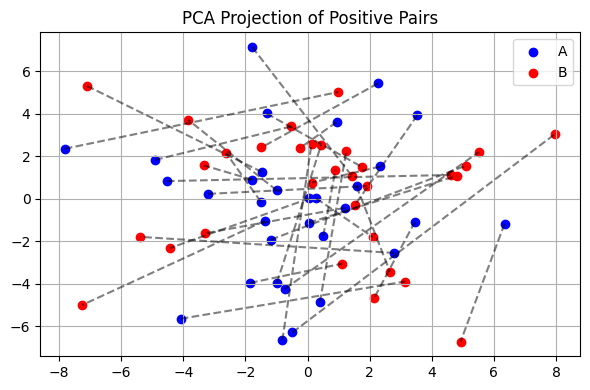

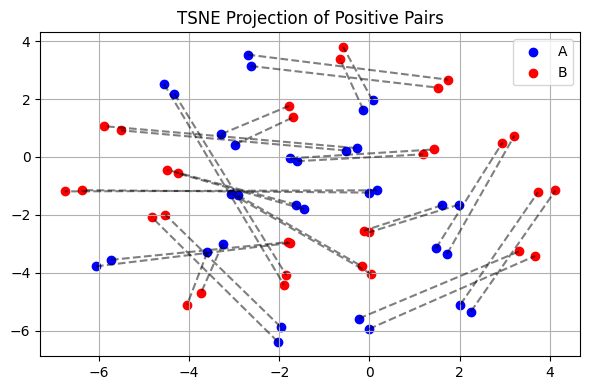

In [61]:
project_and_plot(positive_pairs, method='pca')
project_and_plot(positive_pairs, method='tsne') # El batch debe ser mayor a 30, la perplexity del metodo. Si no, se cambia perplexity